# Scratch pad StatsModels

The purpose of this notebook is to explore single-factor and multiple-factor regression using StatsModels.

In [1]:
import matplotlib.axes as axes
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
colour1 = '#0077bb'

In [3]:
def despine(ax: axes.Axes) -> None:
    """
    Remove the top and right spines of a graph.

    Parameters
    ----------
    ax : axes.Axes

    Example
    -------
    >>> despine(ax)
    """
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

## Example from stock market prices

In [4]:
# Create the dataframe.
# The dependent variable is Stock_Index_Price.
# The independent variables are Interest_Rate and
# Unemployment_Rate.
stock_market = {'Year': [2017,2017,2017,2017,2017,2017,2017,
                         2017,2017,2017,2017,2017,2016,2016,
                         2016,2016,2016,2016,2016,2016,2016,
                         2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,
                          10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,
                                  2.5,2.25,2.25,2.25,2,2,2,
                                  1.75,1.75,1.75,1.75,1.75,
                                  1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,
                                      5.5,5.5,5.5,5.6,5.7,5.9,
                                      6,5.9,5.8,6.1,6.2,6.1,
                                      6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,
                                      1254,1234,1195,1159,1167,
                                      1130,1075,1047,965,943,
                                      958,971,949,884,866,876,
                                      822,704,719]        
                }
df = pd.DataFrame(stock_market,columns=['Year','Month',
                                        'Interest_Rate',
                                        'Unemployment_Rate',
                                        'Stock_Index_Price'])

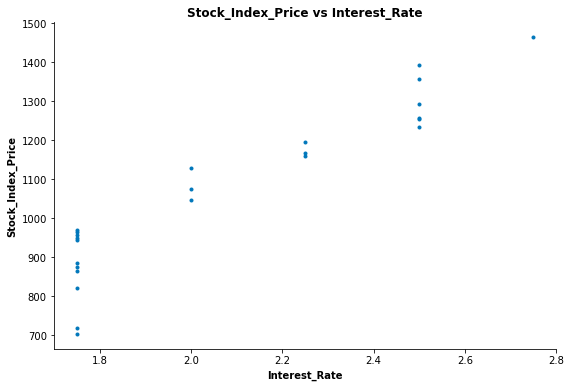

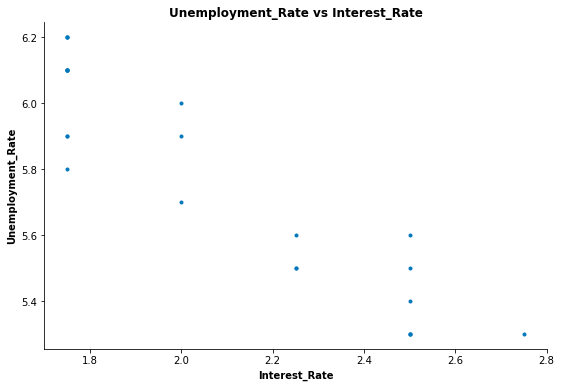

In [5]:
# Scatter plot of Y v. X.
for xx, yy in ('Interest_Rate', 'Stock_Index_Price'),\
              ('Interest_Rate', 'Unemployment_Rate'):
    ax = df.plot.line(x=xx,
                      y=yy,
                      legend=False,
                      style='.',
                      color=colour1,
                      figsize=(9, 6))
    ax.autoscale(enable=True)
    ax.set_title(f'{yy} vs {xx}', fontweight='bold')
    ax.set_ylabel(f'{yy}', fontweight='bold')
    ax.set_xlabel(f'{xx}', fontweight='bold')
    despine(ax)

In [6]:
x = df[['Interest_Rate', 'Unemployment_Rate']]
y = df['Stock_Index_Price']
x = sm.add_constant(x)
model = sm.OLS(y, x, missing='drop').fit()
predictions = model.predict(x)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                 OLS                Adj. R-squared:      0.888   
Dependent Variable:    Stock_Index_Price  AIC:                 275.2158
Date:                  2020-10-12 17:37   BIC:                 278.7500
No. Observations:      24                 Log-Likelihood:      -134.61 
Df Model:              2                  F-statistic:         92.07   
Df Residuals:          21                 Prob (F-statistic):  4.04e-11
R-squared:             0.898              Scale:               4979.0  
-----------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------------
const             1798.4040 899.2481  1.9999 0.0586  -71.6848 3668.4927
Interest_Rate      345.5401 111.3669  3.1027 0.0054  113.9399  577.1403
Unemployment_Rate -250.1466 117.9499 -2.1208 0.0460 -495.4368   -4.8564
-----------------------------------------------------------------------
Omnibus:                 2.691          Durbin-Watson:            0.530
Prob(Omnibus):           0.260          Jarque-Bera (JB):         1.551
Skew:                    -0.612         Prob(JB):                 0.461
Kurtosis:                3.226          Condition No.:            394  
=======================================================================

"""

In [7]:
df['Predicted_Stock_Index_Price'] = predictions

In [8]:
model.params.round(3)

const                1798.404
Interest_Rate         345.540
Unemployment_Rate    -250.147
dtype: float64

In [9]:
model.pvalues.round(3)

const                0.059
Interest_Rate        0.005
Unemployment_Rate    0.046
dtype: float64

In [10]:
model.rsquared_adj.round(3)

0.888

In [11]:
model.conf_int().round(3)

,0,1
const,-71.685,3668.493
Interest_Rate,113.940,577.140
Unemployment_Rate,-495.437,-4.856


In [12]:
np.sqrt(model.mse_resid).round(3)

70.562

In [13]:
np.sqrt(model.mse_model).round(3)

677.074

In [14]:
np.sqrt(model.mse_total).round(3)

210.735

## Example from Boston house prices

In [15]:
features_cols = pd.read_csv('data/boston_features.csv', nrows=1).columns
features = pd.read_csv('data/boston_features.csv', usecols=features_cols[1:])
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
target_cols = pd.read_csv('data/boston_target.csv', nrows=1).columns
target = pd.read_csv('data/boston_target.csv', usecols=target_cols[1:])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
boston = pd.concat([target, features], axis=1, sort=False)
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


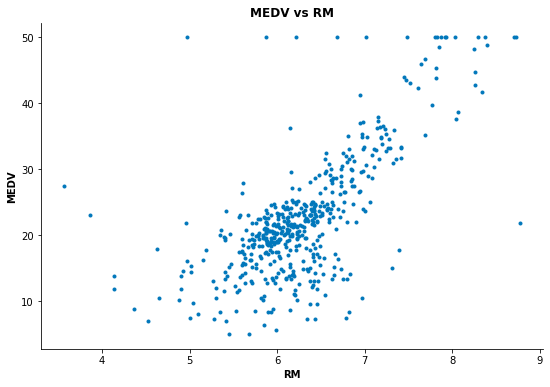

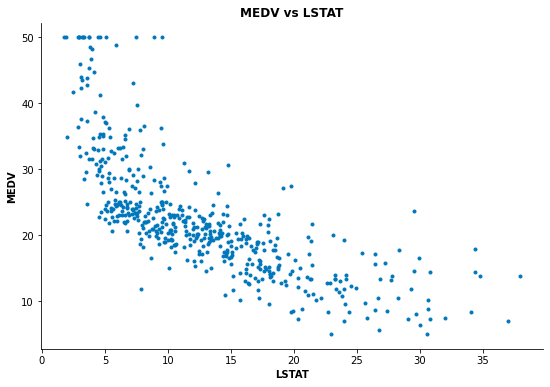

In [18]:
# Scatter plot of Y v. X.
for xx, yy in ('RM', 'MEDV'),\
              ('LSTAT', 'MEDV'):
    ax = boston.plot.line(x=xx,
                      y=yy,
                      legend=False,
                      style='.',
                      color=colour1,
                      figsize=(9, 6))
    ax.autoscale(enable=True)
    ax.set_title(f'{yy} vs {xx}', fontweight='bold')
    ax.set_ylabel(f'{yy}', fontweight='bold')
    ax.set_xlabel(f'{xx}', fontweight='bold')
    despine(ax)

In [19]:
x = features[['RM', 'LSTAT']]
y = target['MEDV']
x = sm.add_constant(x)

In [20]:
model = sm.OLS(y, x, missing='drop').fit()
predictions = model.predict(x)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.637    
Dependent Variable: MEDV             AIC:                3171.5423
Date:               2020-10-12 17:37 BIC:                3184.2219
No. Observations:   506              Log-Likelihood:     -1582.8  
Df Model:           2                F-statistic:        444.3    
Df Residuals:       503              Prob (F-statistic): 7.01e-112
R-squared:          0.639            Scale:              30.694   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     -1.3583     3.1728    -0.4281   0.6688   -7.5919    4.8754
RM         5.0948     0.4445    11.4627   0.0000    4.2216    5.9680
LSTAT     -0.6424     0.0437   -14.6887   0.0000   -0.7283   -0.5564
------------------------------------------------------------------
Omnibus:             145.712       Durbin-Watson:          0.834  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       457.690
Skew:                1.343         Prob(JB):               0.000  
Kurtosis:            6.807         Condition No.:          202    
==================================================================

"""

In [21]:
df['Predicted_MEDV'] = predictions

In [22]:
model.params.round(3)

const   -1.358
RM       5.095
LSTAT   -0.642
dtype: float64

In [23]:
model.pvalues.round(3)

const    0.669
RM       0.000
LSTAT    0.000
dtype: float64

In [24]:
model.rsquared_adj.round(3)

0.637

In [25]:
model.conf_int().round(3)

,0,1
const,-7.592,4.875
RM,4.222,5.968
LSTAT,-0.728,-0.556


In [26]:
np.sqrt(model.mse_resid).round(3)

5.54

In [27]:
np.sqrt(model.mse_model).round(3)

116.784

In [28]:
np.sqrt(model.mse_total).round(3)

9.197